# Time Series
Longitudinal data involves measuring variables repeatedly over time. By following a phenomenon over time, it’s possible to learn a great deal about it!

<center>   
Quarterly earnings (dollars) per Johnson & Johnson share between 1960 and 1980. There are 84 observations: one for each quarter over 21 years<br><br>
<img src="fig1.png" height="300">    
</center>    

<center>   
Monthly mean relative sunspot numbers from 1749 to 1983 recorded by the Swiss Federal Observatory and the Tokyo Astronomical Observatory. The sunspots time series is much longer, with 2,820 observations — 1 per month for 235 years.<br><br>
<img src="fig2.png" height="300">    
</center>    

Studies of time-series data involve two fundamental questions: what happened (description), and what will happen next (forecasting)?
* Economists use time-series data in an attempt to understand and predict what will happen in financial markets.
* City planners use time-series data to predict future transportation demands.
* Climate scientists use time-series data to study global climate change.
* Corporations use time series to predict product demand and future sales.
* Healthcare officials use time-series data to study the spread of disease and to predict the number of future cases in a given region.
* Seismologists study times-series data in order to predict earthquakes.

| Time series | Description |
| --- | ---- |
| AirPassengers | Monthly airline passenger numbers from 1949–1960
| JohnsonJohnson | Quarterly earnings per Johnson & Johnson share
| nhtemp | Average yearly temperatures in New Haven, Connecticut, from 1912–1971
| Nile | Flow of the river Nile
| sunspots | Monthly sunspot numbers from 1749–1983

# Time-series object in R
A vector of numbers, or a column in a data frame, can be saved as a time-series object using the ```ts()``` function: 
##### ```myseries <- ts(data, start=, end=, frequency=)```
* ```myseries``` is the time-series object.
* ```data``` is a numeric vector containing the observations.
* ```start``` specifies the series start time.
* ```end``` specifies the end time (optional).
* ```frequency``` indicates the number of observations per unit time.

In [2]:
sales <- c(18, 33, 41, 7, 34, 35, 24, 25, 24, 21, 25, 20, 22, 31, 40, 29, 25, 21, 22, 54, 31, 25, 26, 35)
tsales <- ts(sales, start=c(2003, 1), frequency=12)

In [3]:
print(tsales)

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
2003  18  33  41   7  34  35  24  25  24  21  25  20
2004  22  31  40  29  25  21  22  54  31  25  26  35


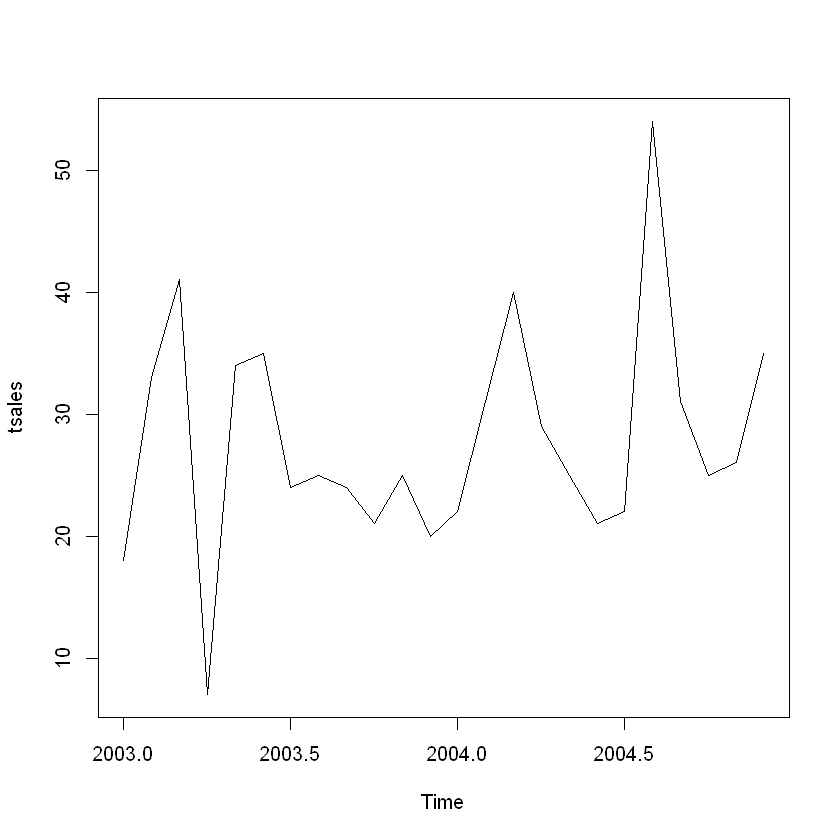

In [4]:
plot(tsales)

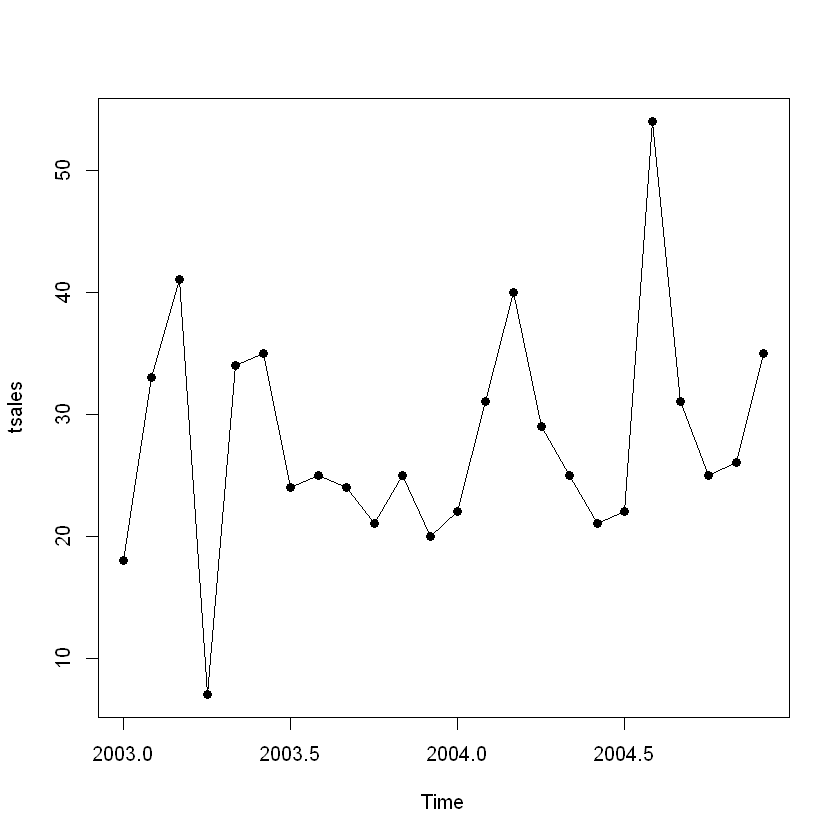

In [5]:
plot(tsales, type="o", pch=19)

In [6]:
start(tsales)

[1] 2003    1

In [7]:
end(tsales)

[1] 2004   12

In [8]:
frequency(tsales)

[1] 12

In [9]:
tsales.subset <- window(tsales, start=c(2003, 5), end=c(2004, 6))
print(tsales.subset)

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
2003                  34  35  24  25  24  21  25  20
2004  22  31  40  29  25  21                        


# Smoothing and Seasonal Decomposition

Just as analysts explore a dataset with descriptive statistics and graphs before attempting to model the data, describing a time series numerically and visually should be the first step before attempting to build complex models

Time series typically have a significant irregular or error component. In order to discern any patterns in the data, you’ll frequently want to plot a smoothed curve that damps down these fluctuations. One of the simplest methods of smoothing a time series is to use simple moving averages. For example, each data point can be replaced with the mean of that observation and one observation before and after it. This is called a centered moving average. 

A centered moving average is defined as:

### $S_{t} = \frac{(Y_{t-q} + \cdot\cdot\cdot + Y_{t} + \cdot\cdot\cdot + Y_{t+q})}{(2q + 1)}$

* $S_{t}$ is the smoothed value at time $t$
* $k = 2q + 1$ is the number of observations that are averaged
* The $k$ value is usually chosen to be an odd number
* By necessity, when using a centered moving average, you lose the $\frac{(k – 1)}{2}$ observations at each end of the series

## Example: 
Consider the Nile time series. It records the annual flow of the river Nile at Ashwan from 1871–1970.

The code in the next listing plots the raw time series and smoothed versions using $k$ equal to $3$, $7$, and $15$

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


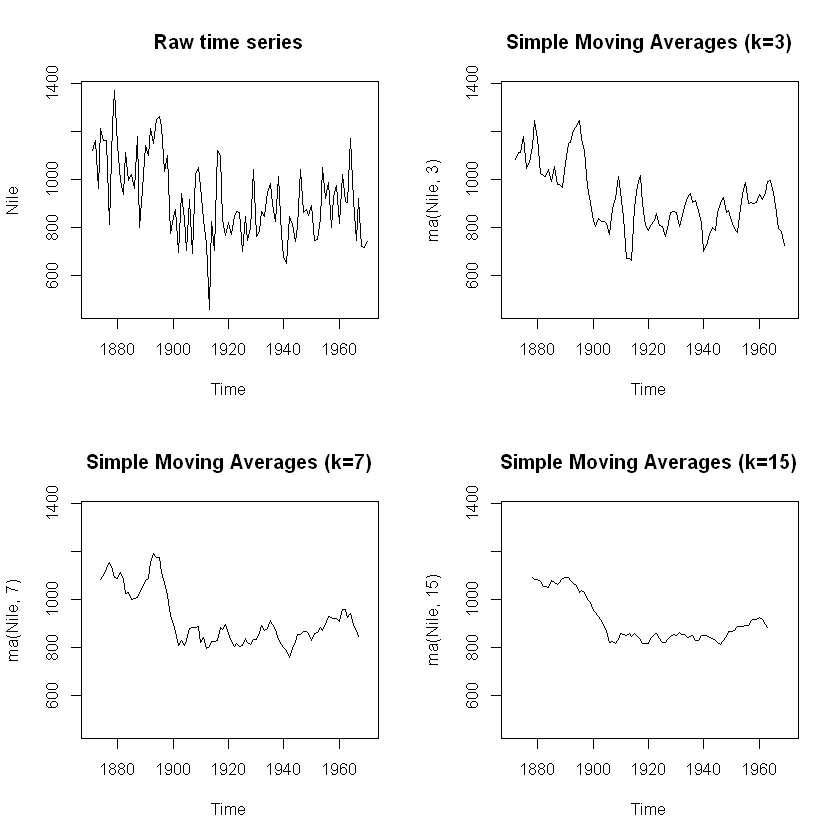

In [10]:
library(forecast)
opar <- par(no.readonly=TRUE)
par(mfrow=c(2,2))
ylim <- c(min(Nile), max(Nile))
plot(Nile, main="Raw time series")
plot(ma(Nile, 3), main="Simple Moving Averages (k=3)", ylim=ylim)
plot(ma(Nile, 7), main="Simple Moving Averages (k=7)", ylim=ylim)
plot(ma(Nile, 15), main="Simple Moving Averages (k=15)", ylim=ylim)
par(opar)

# Seasonal Decomposition
Time-series data that have a seasonal aspect can be decomposed into a *trend component*, a *seasonal component*, and an *irregular component*:
* The trend component captures changes in level over time
* The seasonal component captures cyclical effects due to the time of year
* The irregular (or error) component captures those influences not described by the trend and seasonal effects

The decomposition can be additive or multiplicative.

In an additive model, the components sum to give the values of the time series:

#### $Y_{t} = Trend_{t} + Seasonal_{t} + Irregular_{t}$

where the observation at time $t$ is the sum of the contributions of the trend at time $t$, the seasonal effect at time $t$, and an irregular effect at time $t$.

In a multiplicative model, given by the equation

#### $Y_{t} = Trend_{t} * Seasonal_{t} * Irregular_{t}$

the trend, seasonal, and irregular influences are multiplied

A popular method for decomposing a time series into trend, seasonal, and irregular components is seasonal decomposition by Loess smoothing, this is a regression technique that uses local weighted regression to fit a smooth curve through points in a sequence, which in our case is the Time Series data. 

In R, this can be accomplished with:
#### ```stl(ts, s.window=, t.window=)```
* ```ts``` is the time series to be decomposed.
* ```s.window``` controls how fast the seasonal effects can change over time.
* ```t.window``` controls how fast the trend can change over time.
    * Smaller values allow more rapid change. 
* ```s.window="periodic"``` forces seasonal effects to be identical across years

Only the ts and s.window parameters are required

The ```stl()``` function can only handle additive models, multiplicative models can be transformed into additive models using a ```log``` transformation.
 
The object returned by the ```stl()``` function contains a component called ```time.series``` that contains the trend, season, and irregular portion of each observation.

# Example:
The time series AirPassengers comes with a base R installation and describes the monthly totals (in thousands) of international airline passengers between 1949 and 1960.

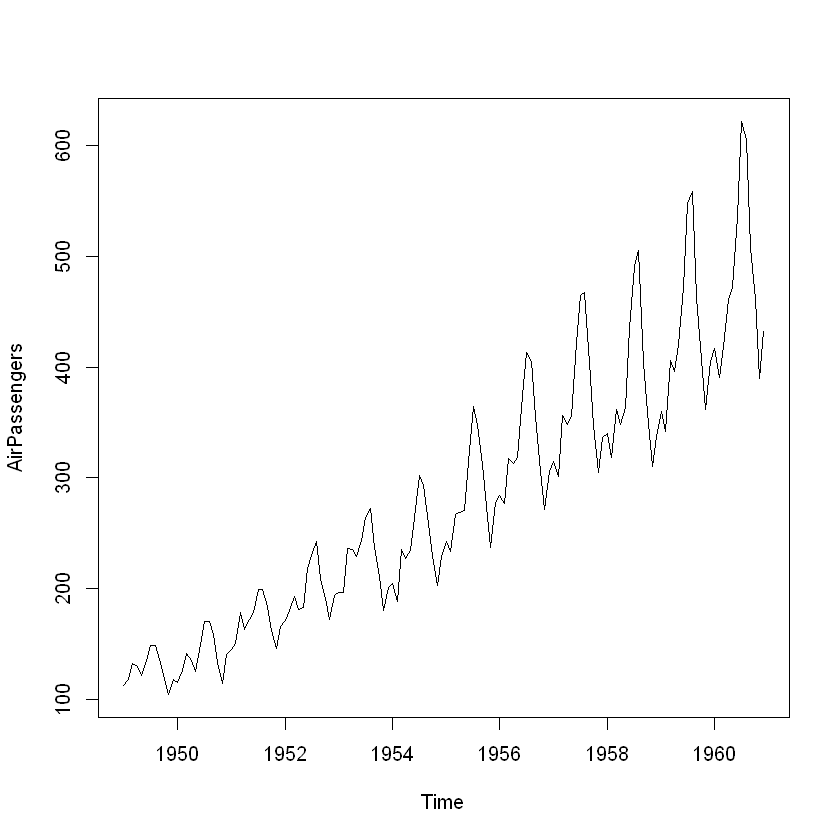

In [11]:
plot(AirPassengers)

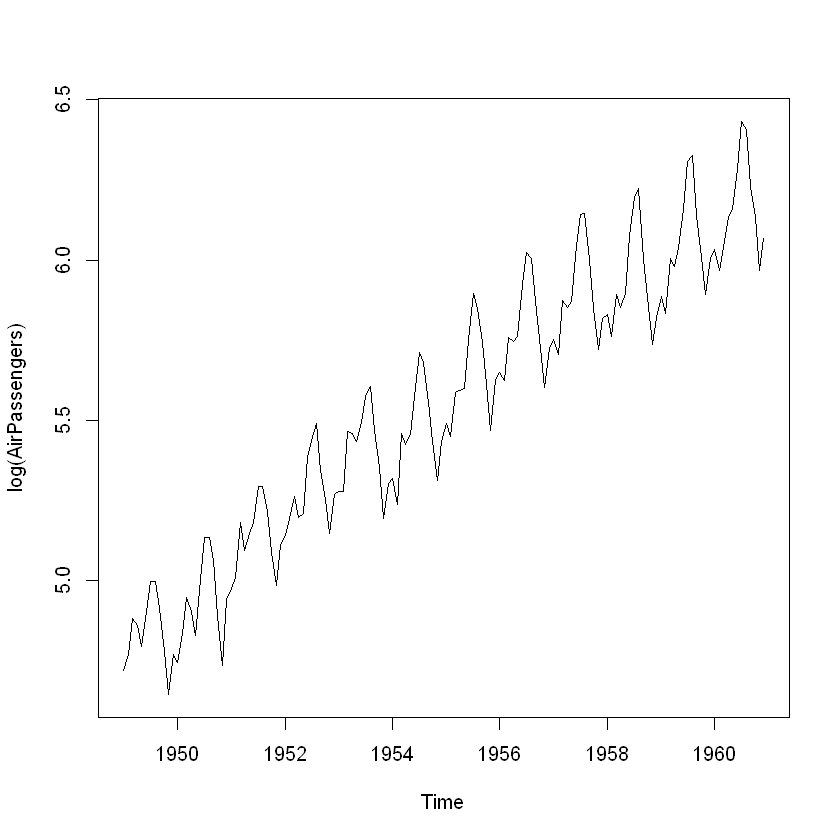

In [12]:
lAirPassengers <- log(AirPassengers)
plot(lAirPassengers, ylab="log(AirPassengers)")

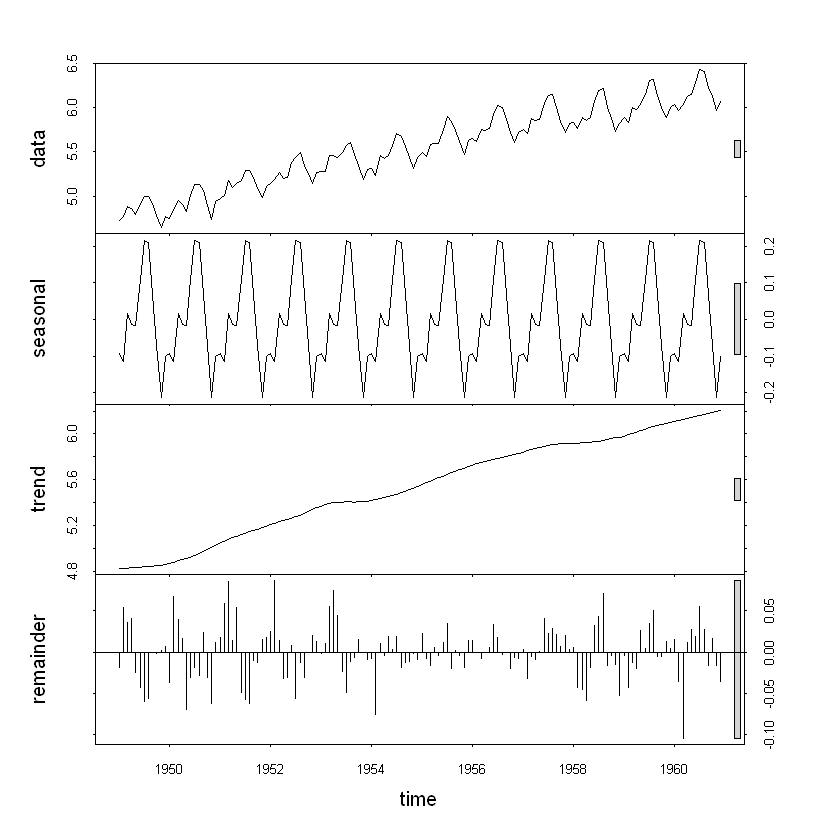

In [13]:
fit <- stl(lAirPassengers, s.window="period")
plot(fit)

In [14]:
print(fit$time.series)

            seasonal    trend     remainder
Jan 1949 -0.09164042 4.829389 -0.0192493585
Feb 1949 -0.11402828 4.830368  0.0543447685
Mar 1949  0.01586585 4.831348  0.0355884457
Apr 1949 -0.01402759 4.833377  0.0404632511
May 1949 -0.01502478 4.835406 -0.0245905300
Jun 1949  0.10978976 4.838166 -0.0426814256
Jul 1949  0.21640041 4.840927 -0.0601151688
Aug 1949  0.20960587 4.843469 -0.0558624690
Sep 1949  0.06747156 4.846011 -0.0008273977
Oct 1949 -0.07024836 4.850883 -0.0015112948
Nov 1949 -0.21352774 4.855756  0.0021630667
Dec 1949 -0.10063625 4.864586  0.0067346600
Jan 1950 -0.09164042 4.873417 -0.0368443057
Feb 1950 -0.11402828 4.883282  0.0670284530
Mar 1950  0.01586585 4.893147  0.0397474219
Apr 1950 -0.01402759 4.903156  0.0161459950
May 1950 -0.01502478 4.913166 -0.0698276070
Jun 1950  0.10978976 4.925404 -0.0312477713
Jul 1950  0.21640041 4.937643 -0.0182444833
Aug 1950  0.20960587 4.954420 -0.0282273969
Sep 1950  0.06747156 4.971197  0.0239260449
Oct 1950 -0.07024836 4.991662 -0

In [15]:
print(exp(fit$time.series))

          seasonal    trend remainder
Jan 1949 0.9124332 125.1344 0.9809347
Feb 1949 0.8922327 125.2571 1.0558486
Mar 1949 1.0159924 125.3798 1.0362293
Apr 1949 0.9860703 125.6345 1.0412930
May 1949 0.9850875 125.8897 0.9757094
Jun 1949 1.1160434 126.2377 0.9582166
Jul 1949 1.2415994 126.5866 0.9416561
Aug 1949 1.2331919 126.9088 0.9456692
Sep 1949 1.0697998 127.2318 0.9991729
Oct 1949 0.9321623 127.8533 0.9984898
Nov 1949 0.8077298 128.4777 1.0021654
Dec 1949 0.9042619 129.6173 1.0067574
Jan 1950 0.9124332 130.7670 0.9638262
Feb 1950 0.8922327 132.0634 1.0693259
Mar 1950 1.0159924 133.3726 1.0405479
Apr 1950 0.9860703 134.7143 1.0162770
May 1950 0.9850875 136.0695 0.9325546
Jun 1950 1.1160434 137.7450 0.9692354
Jul 1950 1.2415994 139.4411 0.9819209
Aug 1950 1.2331919 141.8003 0.9721673
Sep 1950 1.0697998 144.1995 1.0242146
Oct 1950 0.9321623 147.1809 0.9694128
Nov 1950 0.8077298 150.2239 0.9395062
Dec 1950 0.9042619 153.1004 1.0112474
Jan 1951 0.9124332 156.0320 1.0184818
Feb 1951 0.8

Examining the seasonal effects suggests that the number of passengers increased by 24% in July (a multiplier of 1.24) and decreased by 20% in November (with a multiplier of .80)

* The monthplot displays the subseries for each month (all January values connected, all February values connected, and so on), along with the average of each subseries.
* It appears that the trend is increasing for each month in a roughly uniform way

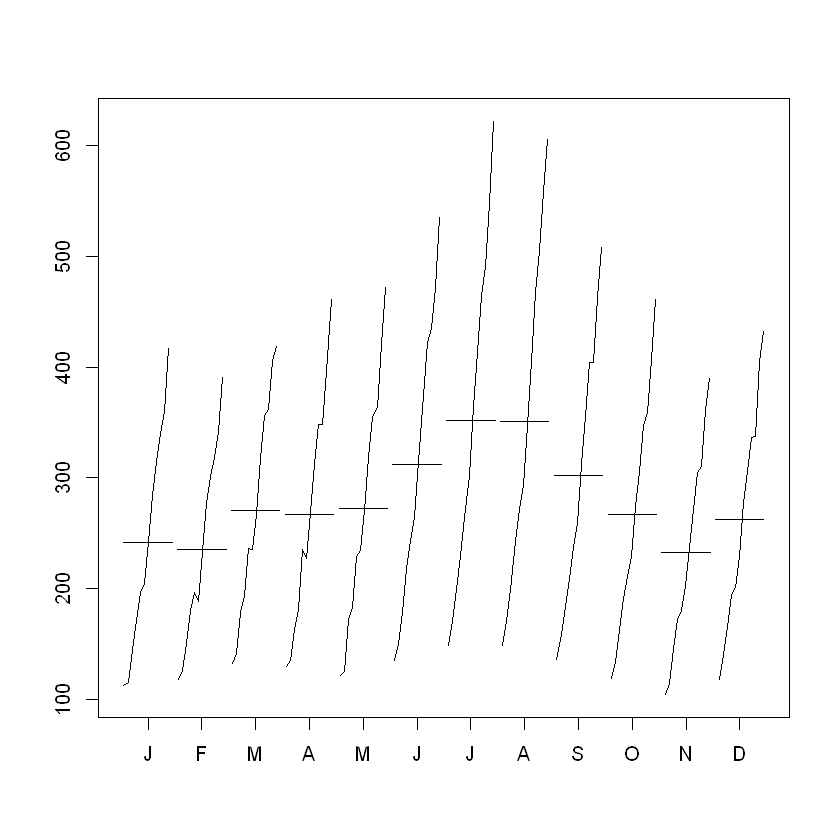

In [16]:
monthplot(AirPassengers, xlab="", ylab="")

The season plot displays the subseries by year. Again you see a similar pattern, with increases in passengers each year, and the same seasonal pattern.

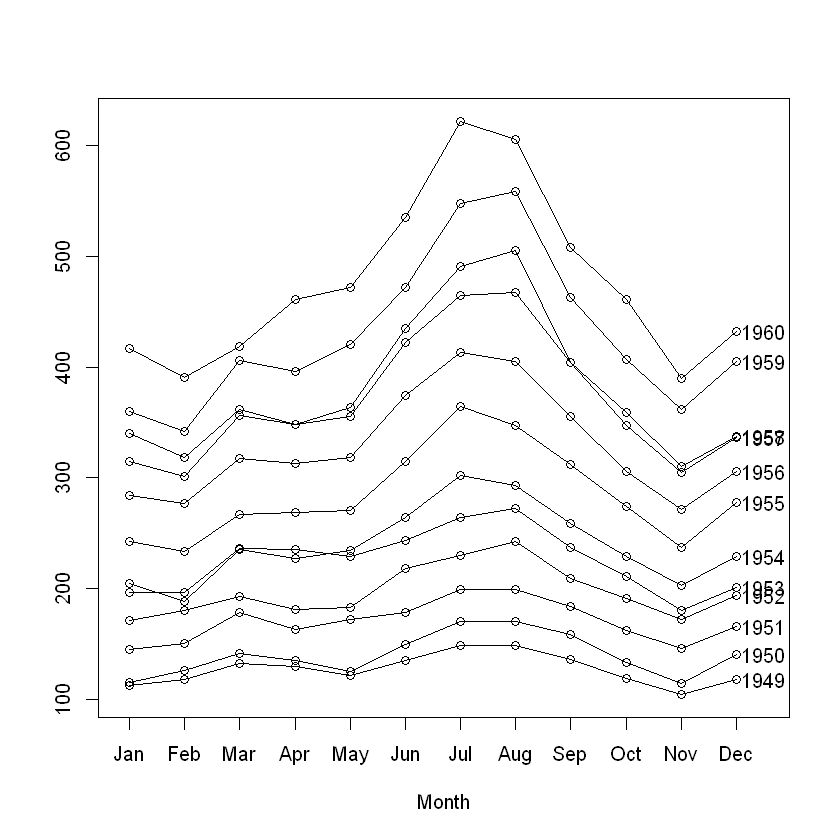

In [17]:
seasonplot(AirPassengers, year.labels="TRUE", main="")

# Exponential forecasting models
* A simple exponential model (single exponential model) fits a time series that has a constant level and an irregular component at time $i$ but has neither a trend nor a seasonal component.
* A double exponential model (also called a Holt exponential smoothing) fits a time series with both a level and a trend.
* A triple exponential model (also called a Holt-Winters exponential smoothing) fits a time series with level, trend, and seasonal components.

## Simple exponential smoothing

The simple exponential smoothing model assumes that an observation in the time series can be described by

### $Y_{t} = level + irregular_{t}$

The prediction at time $Y_{t+1}$ (called the 1-step ahead forecast) is written as:

### $Y_{t+1} = c_{0}Y_{t} + c_{1}Y_{t−1} + c_{2}Y_{t−2} + c_{2}Y_{t−2} + \cdot\cdot\cdot$

where $c_{i} = \alpha(1−\alpha)i$, $i = 0, 1, 2$, ... and $0 ≤ \alpha ≤1$. The $c_{i}$ weights sum to one, and the 1-step ahead forecast can be seen to be a weighted average of the current value and all past values of the time series. 

* The alpha (α) parameter controls the rate of decay forthe weights. The closer alpha is to 1, the more weight is given to recent observations.
* The closer alpha is to 0, the more weight is given to past observations.

### Example:
The nhtemp time series contains the mean annual temperature in degrees Fahrenheit in New Haven (Average Yearly Temperatures in New Haven), Connecticut, from 1912 to 1971.
> There is no obvious trend, and the yearly data lack a seasonal component, so the simple exponential model is a reasonable place to start.

In [19]:
fit <- ets(nhtemp, model="ANN")
print(fit)

ETS(A,N,N) 

Call:
 ets(y = nhtemp, model = "ANN") 

  Smoothing parameters:
    alpha = 0.1819 

  Initial states:
    l = 50.2762 

  sigma:  1.1455

     AIC     AICc      BIC 
265.9298 266.3584 272.2129 


In [20]:
# One Step Ahead
forecast(fit, 1)

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1972       51.87031 50.40226 53.33835 49.62512 54.11549

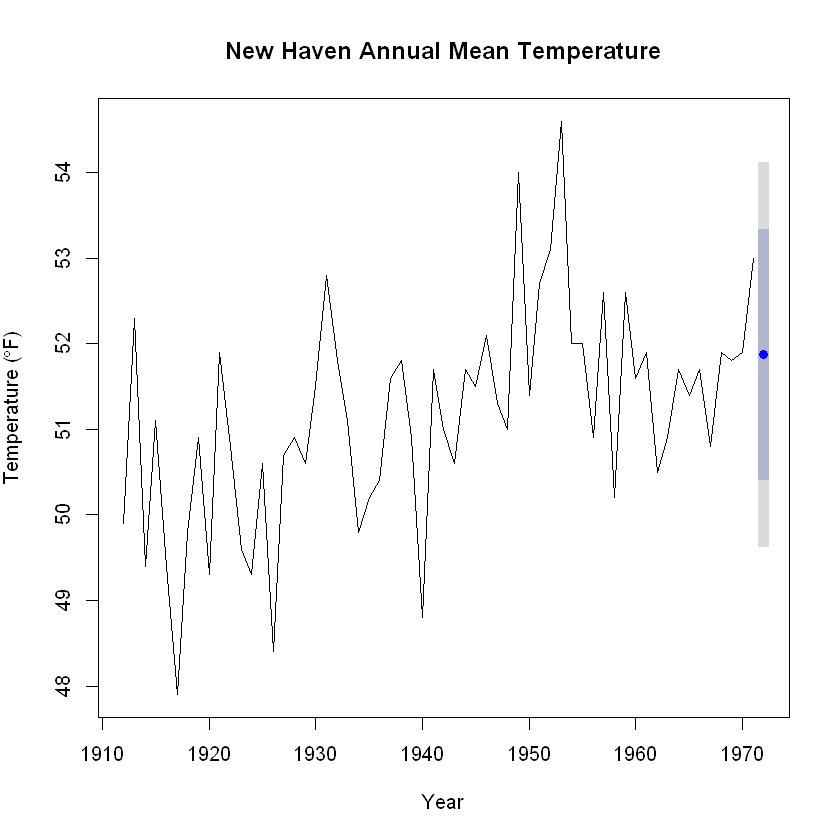

In [22]:
plot(forecast(fit, 1), xlab="Year",
ylab=expression(paste("Temperature (", degree*F,")",)),
main="New Haven Annual Mean Temperature")

In [23]:
accuracy(fit)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.1460657,1.126268,0.8951225,0.2419373,1.7489,0.7512408,-0.006441923


![](fig3.png)

## Holt and Holt-Winters exponential smoothing

The Holt exponential smoothing approach can fit a time series that has an overall level and a trend (slope). The model for an observation at time t is

### $Y_{t} = level + slope*t + irregular_{t}$

* An alpha smoothing parameter controls the exponential decay for the level.
* A beta smoothing parameter controls the exponential decay for the slope. 

Again, each parameter ranges from 0 to 1, with larger values giving more weight to recent observations.

The Holt-Winters exponential smoothing approach can be used to fit a time series that has an overall level, a trend, and a seasonal component. 
Here, the model is:

### $Y_{t} = = level + slope*t + s_{t} + irregular_{t}$

where $s_{t}$ represents the seasonal influence at time t.

In addition to alpha and beta parameters, a gamma smoothing parameter controls the exponential decay of the seasonal component. Like the others, it ranges from 0 to 1, and larger values give more weight to recent observations in calculating the seasonal effect.

### Example: 
The code in the following listing applies the Holt-Winters exponential smoothing approach to predicting the next five values of the AirPassengers time series

In [24]:
fit <- ets(log(AirPassengers), model="AAA")
print(fit)

ETS(A,A,A) 

Call:
 ets(y = log(AirPassengers), model = "AAA") 

  Smoothing parameters:
    alpha = 0.6975 
    beta  = 0.0031 
    gamma = 1e-04 

  Initial states:
    l = 4.7925 
    b = 0.0111 
    s = -0.1045 -0.2206 -0.0787 0.0562 0.2049 0.2149
           0.1146 -0.0081 -0.0059 0.0225 -0.1113 -0.0841

  sigma:  0.0383

      AIC      AICc       BIC 
-207.1694 -202.3123 -156.6826 


In [25]:
accuracy(fit)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.001830684,0.03606976,0.02770885,-0.03435608,0.5079142,0.2289192,0.05590461


In [26]:
pred <- forecast(fit, 5)
pred

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       6.109335 6.060306 6.158365 6.034351 6.184319
Feb 1961       6.092542 6.032679 6.152405 6.000989 6.184094
Mar 1961       6.236626 6.167535 6.305718 6.130960 6.342292
Apr 1961       6.218531 6.141239 6.295823 6.100323 6.336738
May 1961       6.226734 6.141971 6.311498 6.097100 6.356369

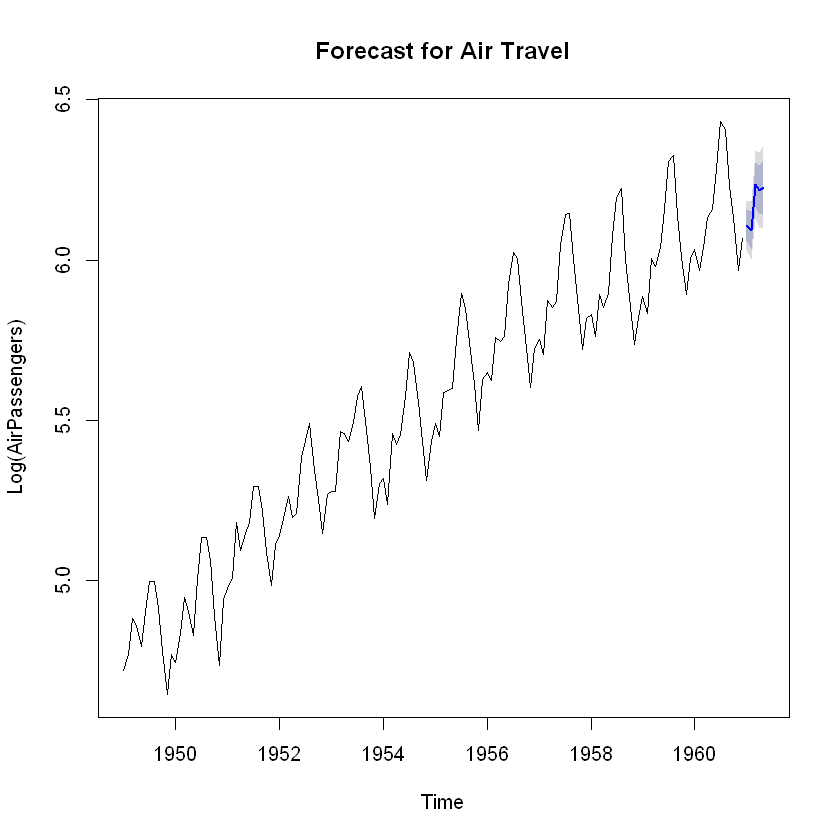

In [27]:
plot(pred, main="Forecast for Air Travel",
ylab="Log(AirPassengers)", xlab="Time")

In [29]:
pred$mean <- exp(pred$mean)
pred$lower <- exp(pred$lower)
pred$upper <- exp(pred$upper)
p <- cbind(pred$mean, pred$lower, pred$upper)
dimnames(p)[[2]] <- c("mean", "Lo 80", "Lo 95", "Hi 80", "Hi 95")
print(p)

                  mean         Lo 80         Lo 95         Hi 80         Hi 95
Jan 1961 2.816148e+195 1.253210e+186 2.138349e+181 1.867312e+205 4.663127e+210
Feb 1961 1.565932e+192 1.064182e+181 2.400443e+175 1.125851e+204 4.181505e+210
Mar 1961 9.581929e+221 1.453072e+207 5.275526e+199 7.255950e+237 5.265532e+246
Apr 1961 1.001656e+218 6.106211e+201 4.967901e+193 3.301065e+235 2.264345e+245
May 1961 6.258417e+219 8.580811e+201 1.182619e+193 1.735989e+239 1.655605e+250


The ```ets()``` function has additional capabilities. You can use it to fit exponential models that have multiplicative components, add a dampening component, and perform automated forecasts.
* Let’s fit an automated exponential model to the Johnson & Johnson data

In [30]:
fit <- ets(JohnsonJohnson)
print(fit)

ETS(M,A,A) 

Call:
 ets(y = JohnsonJohnson) 

  Smoothing parameters:
    alpha = 0.2776 
    beta  = 0.0636 
    gamma = 0.5867 

  Initial states:
    l = 0.6276 
    b = 0.0165 
    s = -0.2293 0.1913 -0.0074 0.0454

  sigma:  0.0921

     AIC     AICc      BIC 
163.6392 166.0716 185.5165 


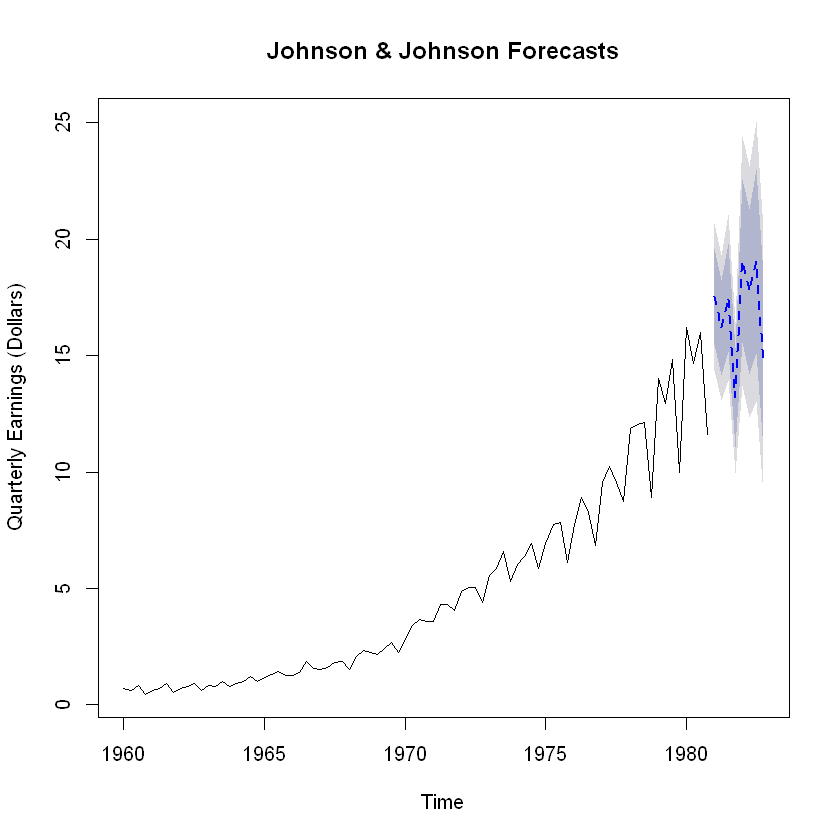

In [31]:
plot(forecast(fit), main="Johnson & Johnson Forecasts",
ylab="Quarterly Earnings (Dollars)", xlab="Time", flty=2)